# Analyse exploratoire du dataset

In [1]:
# Importations des bibliothèques

import warnings
warnings.filterwarnings('ignore')

# Bibliothèques pour aider à la lecture et à la manipulation des données 
import pandas as pd
import numpy as np

# Bibliothèques pour aider à la visualisation des données
import seaborn as sns
import matplotlib.pyplot as plt

import datetime
from datetime import date

from sklearn.preprocessing import StandardScaler, normalize

In [2]:
# Affichage des différentes variables en entier

pd.set_option('display.max_row',100)
pd.set_option('display.max_column',81)

In [3]:
# Importatons notre jeu de données

missing_values = ["n/a", "NaN", "--"]
df = pd.read_csv('segmentation.csv', sep='\t', na_values = missing_values)
df.head(15)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,10,56,3,1,23,2,4,0,4,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,0,6,1,1,13,1,1,0,0,20,1,0,0,0,0,0,3,11,0


In [4]:
# Vérifions les dimensions 
df.shape

(2240, 29)

In [5]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [6]:
# Déterminons les différentes types des variables que nous avons
df.dtypes.value_counts()

int64      25
object      3
float64     1
dtype: int64

In [7]:
# Vérification des valeurs manquantes 
# Pourcentage des valeurs manquantes par ordre coissant (division des valeurs manquantes par la dimension du df et organisation ascendente de celles ci)
(df.isna().sum()/df.shape[0]).sort_values(ascending=False)

Income                 0.010714
Response               0.000000
MntSweetProducts       0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntGoldProds           0.000000
Z_Revenue              0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Z_CostContact          0.000000
ID                     0.000000
dtype: float64

In [8]:
# Supprimons les valeurs manquantes, puisqu'il y en a pas assez
df = df.dropna(subset=['Income'] ,axis=0)

In [9]:
df.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [10]:
# Affichons la distribution de notre dataset
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.0,2216.000000
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,2.323556,4.085289,2.671029,5.800993,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,3.0,11.0,0.150271
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,1.923716,2.740951,2.926734,3.250785,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.0,0.0,0.357417
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [11]:
# Copie du dataset
Data = df.copy()

In [12]:
# Supprimons la variable ID car elle ne nous servira pas dans notre analyse.
Data = Data.drop('ID',axis=1)
Data

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


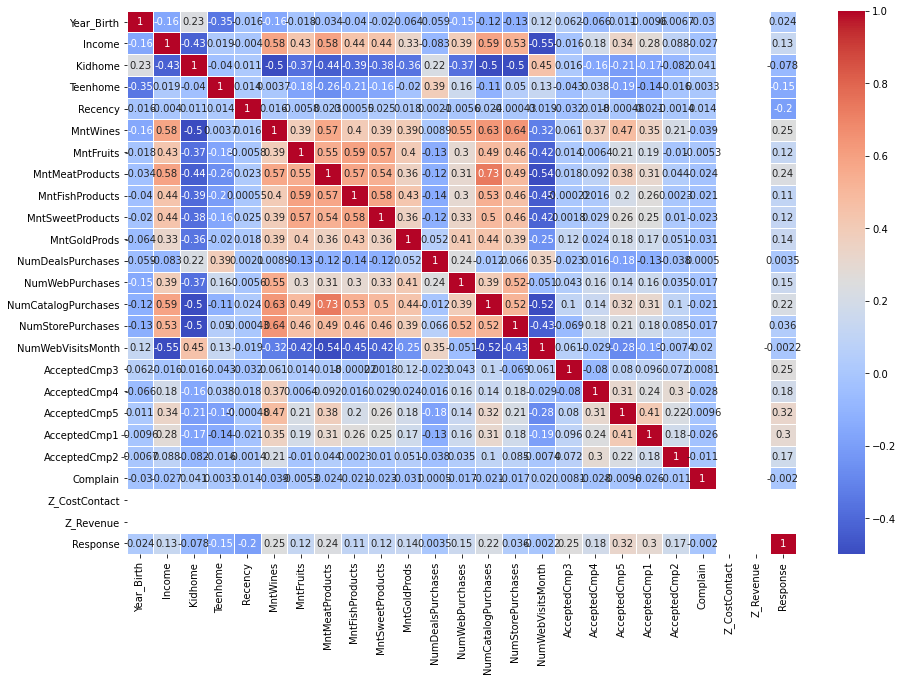

In [13]:
# Affichons la corrélation entre les variables
corr= Data.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot= True,vmin=-0.5,vmax=1, cmap='coolwarm',linewidths=0.75)
plt.show()

In [14]:
print(Data['Dt_Customer'])

0       04-09-2012
1       08-03-2014
2       21-08-2013
3       10-02-2014
4       19-01-2014
           ...    
2235    13-06-2013
2236    10-06-2014
2237    25-01-2014
2238    24-01-2014
2239    15-10-2012
Name: Dt_Customer, Length: 2216, dtype: object


In [15]:
# Créons une colonne qui sera le calcul de l'age du client (dernière année du dataset-l'année de naissance du client)

Data['Age']=2014-Data['Year_Birth']

In [16]:
# Fesons la somme des dépenses des clients
Data['Depenses']=Data['MntWines']+Data['MntFruits']+Data['MntMeatProducts']+Data['MntFishProducts']+Data['MntSweetProducts']+Data['MntGoldProds']

In [17]:
# Examinons les depenses des clients
Data=Data.rename(columns={'MntWines': "Vins",'MntFruits':'Fruits','MntMeatProducts':'Viande','MntFishProducts':'Poisson','MntSweetProducts':'Sucreries','MntGoldProds':'Or'})

In [18]:
# Calculons l'ancienneté du client
Fin_Date = date(2014,10,4)

In [19]:
Data['Anciennete'] = pd.to_datetime(Data['Dt_Customer'], dayfirst=True,format = '%d-%m-%Y')
Data['Anciennete'] = pd.to_numeric(Data['Anciennete'].dt.date.apply(lambda x: (Fin_Date - x)).dt.days, downcast='integer')/30

In [20]:
Data['Anciennete']

0       25.333333
1        7.000000
2       13.633333
3        7.866667
4        8.600000
          ...    
2235    15.933333
2236     3.866667
2237     8.400000
2238     8.433333
2239    23.966667
Name: Anciennete, Length: 2216, dtype: float64

In [21]:
# Renommons certaines colonnes
Data = Data.rename(columns={'NumWebPurchases': "Web",'NumCatalogPurchases':'Catalogue','NumStorePurchases':'Magasin'})


In [22]:
# Examinons la variable 'Marital_Status'
Data['Marital_Status']=Data['Marital_Status'].replace({'Divorced':'Celib','Single':'Celib','Married':'En couple','Together':'En couple','Absurd':'Celib','Widow':'Celib','YOLO':'Celib'})

In [23]:
# Examinons la variable 'Education'
Data['Education']= Data['Education'].replace({'Basic':'Cycle_universitaire','2n Cycle':'Cycle_universitaire','Graduation':'Cycle_univ_superieur','Master':'Cycle_univ_superieur','PhD':'Cycle_univ_superieur'})

([<matplotlib.patches.Wedge at 0x233535d1670>,
 [Text(-1.0294507535624926, 0.38759662793891325, 'Cycle_universitaire'),
  Text(1.029450771707199, -0.38759657974684514, 'Cycle_univ_superieur')],
 [Text(-0.5615185928522686, 0.21141634251213448, '88.54%'),
  Text(0.5615186027493813, -0.21141631622555188, '11.46%')])

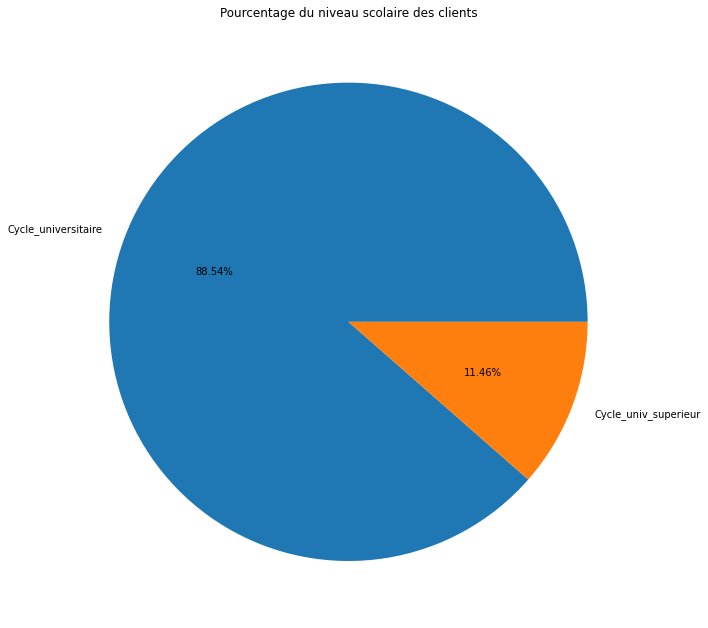

In [24]:
#Visualisons la variable Education
count = pd.value_counts(Data['Education']).tolist()
plt.figure(figsize=(11,11))
plt.title("Pourcentage du niveau scolaire des clients")
plt.pie(x=count,labels=["Cycle_universitaire","Cycle_univ_superieur"],autopct='%.2f%%')

#### Nous remarquons qu'il y a plus de client (88,54%) qui ont fait le premier cycle universiatire et 11, 46% ont un niveau plus élévé

In [25]:
# Nous pouvons regroupper deux variables ensembles kidhome et teenhome puis qu'il donne le nombre d'enfants dans le ménage du client
Data['Nbr_Enf']=Data['Kidhome']+Data['Teenhome']

In [26]:
Data['Nbr_Enf']

0       0
1       2
2       0
3       1
4       1
       ..
2235    1
2236    3
2237    0
2238    1
2239    2
Name: Nbr_Enf, Length: 2216, dtype: int64

In [27]:
# Nous pouvons simplifier la colonne 'children' 
Data['Enfants'] = np.where(Data.Nbr_Enf> 0, 'enfant', 'Pas_d_enfant')

In [28]:
Data['Enfants']

0       Pas_d_enfant
1             enfant
2       Pas_d_enfant
3             enfant
4             enfant
            ...     
2235          enfant
2236          enfant
2237    Pas_d_enfant
2238          enfant
2239          enfant
Name: Enfants, Length: 2216, dtype: object

([<matplotlib.patches.Wedge at 0x2335363b430>,
 [Text(-0.6860128990602854, 0.859875748188599, 'enfant'),
  Text(0.6860128185529041, -0.8598758124177587, 'Pas_d_enfant')],
 [Text(-0.3741888540328829, 0.4690231353755994, '71.44%'),
  Text(0.3741888101197658, -0.46902317040968644, '28.56%')])

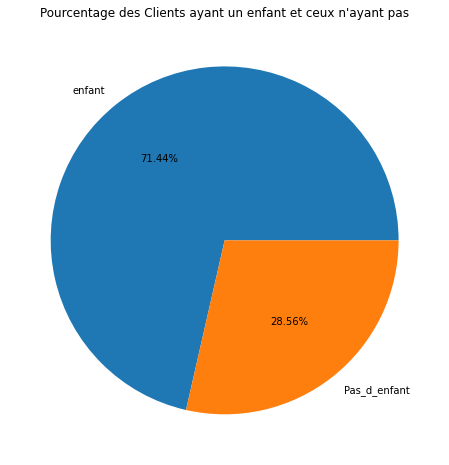

In [29]:
count = pd.value_counts(Data['Enfants']).tolist()
plt.figure(figsize=(8,8))
plt.title("Pourcentage des Clients ayant un enfant et ceux n'ayant pas")
plt.pie(x=count,labels=["enfant","Pas_d_enfant"],autopct='%.2f%%')

#### Nous remarquons qu'il y a 71,44 % de client qui ont des enfants contre 28,56% qui n'on en pas

In [30]:
# Après analyse, affichons notre nouveau dataset

Data=Data[['Age','Education','Marital_Status','Income','Depenses','Anciennete','Enfants','Nbr_Enf','Vins','Fruits','Viande','Poisson','Sucreries','Or']]
Data.head()

,Age,Education,Marital_Status,Income,Depenses,Anciennete,Enfants,Nbr_Enf,Vins,Fruits,Viande,Poisson,Sucreries,Or
0,57,Cycle_univ_superieur,Celib,58138.0,1617,25.333333,Pas_d_enfant,0,635,88,546,172,88,88
1,60,Cycle_univ_superieur,Celib,46344.0,27,7.000000,enfant,2,11,1,6,2,1,6
2,49,Cycle_univ_superieur,En couple,71613.0,776,13.633333,Pas_d_enfant,0,426,49,127,111,21,42
3,30,Cycle_univ_superieur,En couple,26646.0,53,7.866667,enfant,1,11,4,20,10,3,5
4,33,Cycle_univ_superieur,En couple,58293.0,422,8.600000,enfant,1,173,43,118,46,27,15


In [37]:
# Y a t'il des valeurs aberrantes ? Vérifions cela
#for i in Data:
#    sns.boxplot(y=Data[f"{i}"], data=Data)
#    plt.savefig('Correlion_with_all_features.png', dpi=200)
#    plt.show()

### Fesons un regroupement des différents types de clients
#### Définisons 4 types de clients
* Etoilé : Ancien client avec des revenus élévés et des dépenses élévées
* Besoin attention: Nouveau client avec des revenus inferieurs à la moyen et de faible depenses
* Bon Potentiel : Nouveau client avec des revenus élevéz et des dépenses élevés
* Faible client : Ancien client avec des revenus inférieurs à la moyen et une nature peu dépensière

# Preprocessing

In [36]:
Data.columns

Index(['Age', 'Education', 'Marital_Status', 'Income', 'Depenses',
       'Anciennete', 'Enfants', 'Nbr_Enf', 'Vins', 'Fruits', 'Viande',
       'Poisson', 'Sucreries', 'Or'],
      dtype='object')

In [39]:
# Encodage des variables qualitatives
enc = {'Celib': 0,
       'En couple':1,
       'Cycle_univ_superieur':1,
       'Cycle_universitaire':0,
       'enfant':1,
       'Pas_d_enfant':0,  
}

In [32]:
# Normalisons nos données 
scaler = StandardScaler()
dataset = Data[['Income','Anciennete','Depenses']]
X_std = scaler.fit_transform(dataset)
X = normalize(X_std,norm='l2')

In [33]:
dataset = dataset.replace({0:'Etoilé',1:'Besoin attention',2:'Bon potentiel',3:'Faible client'})

In [40]:
dataset

,Income,Anciennete,Depenses
0,58138.0,25.333333,1617
1,46344.0,7.000000,27
2,71613.0,13.633333,776
3,26646.0,7.866667,53
4,58293.0,8.600000,422
...,...,...,...
2235,61223.0,15.933333,1341
2236,64014.0,3.866667,444
2237,56981.0,8.400000,1241
2238,69245.0,8.433333,843
